<br>

# Introdução

In [1]:
#!pip3 install simplekml --upgrade
#!pip3 install open-geodata --upgrade
#!pip3 install traquitanas --upgrade

In [2]:
import os
import folium
import simplekml
import numpy as np
import pandas as pd
import seaborn as sns
import geopandas as gpd
from folium import plugins
from datetime import date

In [3]:
from open_geodata import geo, functions, lyr, converts
from open_geodata import folium_plus

In [4]:
from paths import *
from cod_ibge import *

<br>

Lista quais os Municípios que exportei dados.

In [5]:
os.listdir(output_path_cidades)

['SP_352690', 'SP_354890']

In [6]:
# Parameters
estado = 'SP'
cod_ibge = '3548906' # São Carlos
cod_ibge = '3526902' # Limeira

# Adjust Code
cod_ibge_adjusted = adjust_cod_ibge(cod_ibge)

# Path name
city_path = '{}_{}'.format(estado, cod_ibge_adjusted)
city_path

Padrão IBGE novo, com código de 7 dígitos.
Correções necessárias aplicadas!
Código IBGE: 352690


'SP_352690'

<br>

Confere se o município selecionado tem dados exportados

In [7]:
city_path in os.listdir(output_path_cidades)

True

<br>

Cria Diretórios de output de Mapas

In [8]:
geo_path = os.path.join(output_path_cidades, city_path, 'analysis_geo')
os.makedirs(geo_path, exist_ok=True)

<br>

# Layers

<br>

## ETAs

A concepção inicial era avaliar as coordenadas de latitude e longitude das ETAs, porém observei que no Siságua não existem essas informações

In [9]:
# Read Table
df = pd.read_excel(
    os.path.join(output_path_cidades, city_path, 'cadastro', 'cadastro_tratamento_de_agua.xlsx')
)

# Filtra os Últimos
if date.today().year in set(df['Ano De Referência']):
    df = df.loc[df['Ano De Referência'] == date.today().year]
    df.reset_index(drop=True, inplace=True)
    print(df.info())
else:
    print('Erro')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 58 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Região Geográfica                                    76 non-null     object 
 1   Regional De Saúde                                    76 non-null     object 
 2   Município                                            76 non-null     object 
 3   Tipo Da Instituição                                  76 non-null     object 
 4   Sigla Da Instituição                                 4 non-null      object 
 5   Nome Da Instituição                                  76 non-null     object 
 6   Cnpj Da Instituição                                  76 non-null     int64  
 7   Nome Do Escritório Regional/Local                    4 non-null      object 
 8   Cnpj Do Escritório Regional/Local                    4 non-null      flo

In [10]:
# Seleciona SAA
df = df.loc[df['Tipo Da Forma De Abastecimento'].str.startswith('SAA')]

# Seleciona SAC
#df.loc[df['Código Forma De Abastecimento'].str.startswith('SAC')]

# Results
df.head()

,Região Geográfica,Regional De Saúde,Município,Tipo Da Instituição,Sigla Da Instituição,Nome Da Instituição,Cnpj Da Instituição,Nome Do Escritório Regional/Local,Cnpj Do Escritório Regional/Local,Tipo Da Forma De Abastecimento,...,Fonte,Cisterna,Canalização,Outro Tipo De Suprimento,Responsável Técnico,Formação Profissional Do Responsável Técnico,Número Do Conselho De Classe Do Responsável Técnico,Anotação De Responsabilidade Técnica (Art),Uf,Código Ibge
0,SUDESTE,GVS XX - PIRACICABA,LIMEIRA,Local,NaN,BRK AMBIENTAL LIMEIRA SA,585900000148,NaN,NaN,SAA,...,NaN,NaN,NaN,NaN,ERICK KRAMBECK,Outra,CRQ 04262162,14501/2021,SP,352690
1,SUDESTE,GVS XX - PIRACICABA,LIMEIRA,Local,NaN,BRK AMBIENTAL LIMEIRA SA,585900000148,NaN,NaN,SAA,...,NaN,NaN,NaN,NaN,ERICK KRAMBECK,Outra,CRQ 04262162,13481/2021,SP,352690
2,SUDESTE,GVS XX - PIRACICABA,LIMEIRA,Local,NaN,BRK AMBIENTAL LIMEIRA SA,585900000148,NaN,NaN,SAA,...,NaN,NaN,NaN,NaN,ERICK KRAMBECK,Outra,CRQ 04262162,14502/2021,SP,352690


<br>

## Captação

In [11]:
# Read Table
df = pd.read_excel(
    os.path.join(output_path_cidades, city_path, 'cadastro', 'cadastro_pontos_captacao.xlsx')
)

# Filtra os Últimos
if date.today().year in set(df['Ano De Referência']):
    df = df.loc[df['Ano De Referência'] == date.today().year]
    df.reset_index(drop=True, inplace=True)
    print(df.info())
else:
    print('Erro')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83 entries, 0 to 82
Data columns (total 24 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Região Geográfica                           83 non-null     object 
 1   Regional De Saúde                           83 non-null     object 
 2   Município                                   83 non-null     object 
 3   Tipo Da Instituição                         83 non-null     object 
 4   Sigla Da Instituição                        4 non-null      object 
 5   Nome Da Instiuição                          83 non-null     object 
 6   Nome Do Escritório Regional/Local           4 non-null      object 
 7   Cnpj Do Escritório Regional/Local           4 non-null      float64
 8   Tipo Da Forma De Abastecimento              83 non-null     object 
 9   Código Forma De Abastecimento               83 non-null     object 
 10  Nome Da Forma De

In [12]:
# Adjusta os dtypes
df['Longitude'] = pd.to_numeric(df['Longitude'].str.replace(',', '.'), errors='coerce')
df['Latitude'] = pd.to_numeric(df['Latitude'].str.replace(',', '.'), errors='coerce')

# Convert
gdf = converts.df2geojson2(df, lat='Latitude', long='Longitude', epsg=4326)

In [13]:
# Save
gdf.to_file(
    os.path.join(geo_path, 'cadastro_pontos_captacao.geojson'),
    driver='GeoJSON'
)

# Results
gdf.head(2)

/home/michel/Documents/Conda/envs/pablocarreira-py39/lib/python3.9/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


,Região Geográfica,Regional De Saúde,Município,Tipo Da Instituição,Sigla Da Instituição,Nome Da Instiuição,Nome Do Escritório Regional/Local,Cnpj Do Escritório Regional/Local,Tipo Da Forma De Abastecimento,Código Forma De Abastecimento,...,Tipo De Captação,Categoria Do Manancial Superficial,Nome Do Manancial Superficial,Categoria Do Ponto De Captação Subterrâneo,Nome Do Ponto De Captação Subterrâneo,Outorga,Vazão,Uf,Código Ibge,geometry
0,SUDESTE,GVS XX - PIRACICABA,LIMEIRA,Local,NaN,BRK AMBIENTAL LIMEIRA SA,NaN,NaN,SAA,S352690000003,...,SUPERFICIAL,rio,RIO JAGUARI,NaN,NaN,S,185.0,SP,352690,POINT (-47.27828 -22.66282)
1,SUDESTE,GVS XX - PIRACICABA,LIMEIRA,Local,NaN,BRK AMBIENTAL LIMEIRA SA,NaN,NaN,SAA,S352690000003,...,SUPERFICIAL,ribeirao,RIBEIRAO DO PINHAL,NaN,NaN,S,615.0,SP,352690,POINT (-47.28769 -22.66263)


In [14]:
#gdf.columns
#set(gdf['Tipo De Captação'])
#set(gdf['Tipo Da Forma De Abastecimento'])

In [15]:
def add_lyr_captacao_saa(output_geo_path):
    # Input
    gdf = gpd.read_file(os.path.join(output_geo_path, 'cadastro_pontos_captacao.geojson'))
    gdf = gdf.loc[gdf['Tipo Da Forma De Abastecimento'] == 'SAA']
    gdf['geometry'] = gdf['geometry'].replace('None', np.nan)
    gdf = gdf.loc[gdf['geometry'] != None]
    gdf = gdf.to_crs(epsg=4326)
    print("""O layer "Captação SAA" tem {} registros com coordenadas e {} registros sem coordenadas""".format(
            len(gdf),
            len(gdf.loc[gdf['geometry'] == None])
        )
    )

    # Popup
    gdf['popup'] = gdf.apply(popup_html_captacoes, axis=1)
    
    # Style
    colors = {
        'SUBTERRANEO': 'pink',
        'SUPERFICIAL': 'blue',
    }    
    
    # Group
    feature_group = folium.FeatureGroup('Captações SAA')
    
    # Loop
    for index, row in gdf.iterrows():
        #
        lyr = folium.Marker(
            location=[row['geometry'].y, row['geometry'].x],
            popup=folium.Popup(
                folium.Html(row['popup'], script=True),
                min_width=350,
                max_width=450,
                parse_html=True,
            ),
            tooltip=row['Nome Da Forma De Abastecimento'],
            icon=folium.Icon(color=colors[row['Tipo De Captação']])
        )
        
        feature_group.add_child(lyr)
    return feature_group

In [16]:
def add_lyr_captacao_sac(output_geo_path):
    # Input
    gdf = gpd.read_file(os.path.join(output_geo_path, 'cadastro_pontos_captacao.geojson'))
    gdf = gdf.loc[gdf['Tipo Da Forma De Abastecimento'] == 'SAC']
    gdf['geometry'] = gdf['geometry'].replace('None', np.nan)
    gdf = gdf.loc[gdf['geometry'] != None]
    gdf = gdf.to_crs(epsg=4326)
    print("""O layer "Captação SAC" tem {} registros com coordenadas e {} registros sem coordenadas""".format(
            len(gdf),
            len(gdf.loc[gdf['geometry'] == None])
        )
    )

    # Popup
    gdf['popup'] = gdf.apply(popup_html_captacoes, axis=1)
    
    # Style
    colors = {
        'SUBTERRANEO': 'pink',
        'SUPERFICIAL': 'blue',
    }    
    
    # Group
    feature_group = folium.FeatureGroup('Captações SAC', show=True)
    
    # Loop
    for index, row in gdf.iterrows():
        #
        lyr = folium.Marker(
            location=[row['geometry'].y, row['geometry'].x],
            popup=folium.Popup(
                folium.Html(row['popup'], script=True),
                min_width=350,
                max_width=450,
                parse_html=True,
            ),
            tooltip=row['Nome Da Forma De Abastecimento'],
            icon=folium.Icon(color=colors[row['Tipo De Captação']])
        )
        
        feature_group.add_child(lyr)
    return feature_group

In [17]:
def popup_html_captacoes(row):
    # Data
    nome = row['Nome Da Instiuição']
    tipo = row['Tipo De Captação']
    outorga = row['Outorga']
    tipo_forma = row['Tipo Da Forma De Abastecimento']
    nome_forma = row['Nome Da Forma De Abastecimento']
	
    # Infos
    popup = """
    <div>
    <h5>{}</h5>
    <br>Responsável: <b>{}</b>
    <br>Tipo da Forma de Abastecimento: <b>{}</b>
    <br>Nome da Forma de Abastecimento: <b>{}</b>
    <br>Tem Ouutorga?: <b>{}</b>
    </div>
    """.format(tipo_forma, nome, tipo, nome_forma, outorga)
    return popup

<br>

## Município

In [18]:
# List geodataframes
geo.get_dataset_names()

# Load geodataframe
gdf_sp = geo.load_dataset('sp_250k_wgs84')

/home/michel/Documents/Conda/envs/pablocarreira-py39/lib/python3.9/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


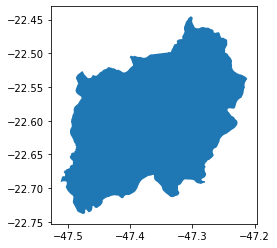

In [19]:
gdf_sp_mun = gdf_sp.loc[gdf_sp['id_municipio'] == int(cod_ibge)]
gdf_sp_mun.plot()
gdf_sp_mun.to_file(
    os.path.join(geo_path, 'limite_municipio.geojson'),
    driver='GeoJSON'
)

In [20]:
def add_lyr_municipio(output_geo_path):
    # Input
    gdf = gpd.read_file(os.path.join(output_geo_path, 'limite_municipio.geojson'))
    gdf = gdf.to_crs(epsg=4326)
    
    # Popup
    #gdf['popup'] = gdf.apply(popup_html_est_aut_empresas, axis=1)

    # Layer
    return folium.GeoJson(
        gdf,
        name='Limite Municipal',
        smooth_factor=1.0,
        style_function=lambda x: {
            'fillColor': '#f7f7f7',
            'color': '#f7f7f7',
            'weight': 3,
            'fillOpacity': 0.1,
        },
        highlight_function=lambda x: {
            'weight': 5,
            'fillOpacity': 0.1,
        },
        # popup=folium.GeoJsonPopup(
        #     ['popup'],
        #     parse_html=False,
        #     max_width='400',
        #     show=False,
        #     labels=False,
        #     sticky=True,            
        # ),
        marker=folium.Marker(
            icon=folium.Icon(
                color='lightgray',
                icon_color='#FFFF00',
                #icon='leaf',
            ),
        ),
        # tooltip=folium.GeoJsonTooltip(
        #     fields=['municipio_nome'],
        #     aliases=['Município'],
        #     sticky=True,
        #     opacity=0.9,
        #     direction='right',
        # ),
        embed=False,
        zoom_on_click=False,
        control=True,
        show=False,
    )

<br>

## Municípios Vizinhos

/home/michel/Documents/Conda/envs/pablocarreira-py39/lib/python3.9/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


<AxesSubplot:>

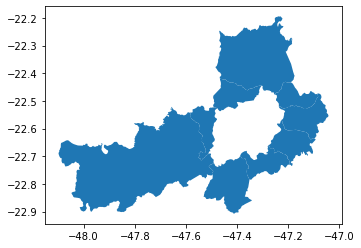

In [22]:
gdf_sp_viz = functions.share_boundary(gdf_sp, gdf_sp_mun)
gdf_sp_viz.to_file(
    os.path.join(geo_path, 'limite_municipios_vizinhos.geojson'),
    driver='GeoJSON'
)
gdf_sp_viz.plot()

In [23]:
def add_lyr_municipios_vizinhos(output_geo_path):
    # Input
    gdf = gpd.read_file(os.path.join(output_geo_path, 'limite_municipios_vizinhos.geojson'))
    gdf = gdf.to_crs(epsg=4326)    
    
    # Popup
    #gdf['popup'] = gdf.apply(popup_html_est_aut_empresas, axis=1)

    # Layer
    return folium.GeoJson(
        gdf,
        name='Limite Municipíos Vizinhos',
        smooth_factor=1.0,
        style_function=lambda x: {
            'fillColor': '#b8b8b8',
            'color': '#b8b8b8',
            'weight': 1,
            'fillOpacity': 0.6,
        },
        highlight_function=lambda x: {
            'weight': 3,
            'fillOpacity': 0.2,
        },
        # popup=folium.GeoJsonPopup(
        #     ['popup'],
        #     parse_html=False,
        #     max_width='400',
        #     show=False,
        #     labels=False,
        #     sticky=True,            
        # ),
        marker=folium.Marker(
            icon=folium.Icon(
                color='lightgray',
                icon_color='#FFFF00',
                #icon='leaf',
            ),
        ),
        tooltip=folium.GeoJsonTooltip(
            fields=['municipio_nome'],
            aliases=['Município'],
            sticky=True,
            opacity=0.9,
            direction='right',
        ),
        embed=False,
        zoom_on_click=False,
        control=True,
        show=True,
    )

<br>

# Map

In [24]:
def get_map(input_geojson):
    # Input
    gdf = gpd.read_file(input_geojson)
    gdf = gdf.to_crs(epsg=4326)
    sw = gdf.bounds[['miny', 'minx']].min().values.tolist()
    ne = gdf.bounds[['maxy', 'maxx']].max().values.tolist()
    bounds = [sw, ne]
    
    # Zoom
    min_zoom = 8
    max_zoom = 21
    padding = 1
    
    # Create Map
    m = folium.Map(
        min_zoom=min_zoom,
        max_zoom=max_zoom,
        max_bounds=True,
        min_lat=bounds[0][0]*((100+padding)/100),
        min_lon=bounds[0][1]*((100+padding)/100),
        max_lat=bounds[1][0]*((100-padding)/100),
        max_lon=bounds[1][1]*((100-padding)/100),
        tiles=None,
        # zoom_delta=0.1,
        # zoom_start=10,
    )
    
    # Add Layers
    m.add_child(lyr.base.google_hybrid(min_zoom, max_zoom))
    m.add_child(lyr.base.google_satellite(min_zoom, max_zoom))
    m.add_child(lyr.base.google_terrain(min_zoom, max_zoom))    
    m.add_child(lyr.base.google_streets(min_zoom, max_zoom))    

    # Monitoramento
    m.add_child(add_lyr_captacao_saa(geo_path))
    m.add_child(add_lyr_captacao_sac(geo_path))
    m.add_child(add_lyr_municipio(geo_path))
    m.add_child(add_lyr_municipios_vizinhos(geo_path))    

    # Plugins
    m.fit_bounds(bounds)
    plugins.Fullscreen(
        position='topleft',
        title='Clique para Maximizar',
        title_cancel='Mininizar',
    ).add_to(m)
    folium.LayerControl(
        position='topright',
        collapsed=False,
    ).add_to(m)
    return m

In [25]:
# Create Maps
m = get_map(os.path.join(geo_path, 'limite_municipios_vizinhos.geojson'))

# Add Legend
colors = {
    'SUBTERRANEO': 'pink',
    'SUPERFICIAL': 'blue',
}
m = folium_plus.adds.add_categorical_legend(m, title='Captações', color_by_label=colors)

# Save
m.save(os.path.join(geo_path, 'map_captacao.html'))

# Results
m

O layer "Captação SAA" tem 4 registros com coordenadas e 0 registros sem coordenadas
O layer "Captação SAC" tem 67 registros com coordenadas e 0 registros sem coordenadas
